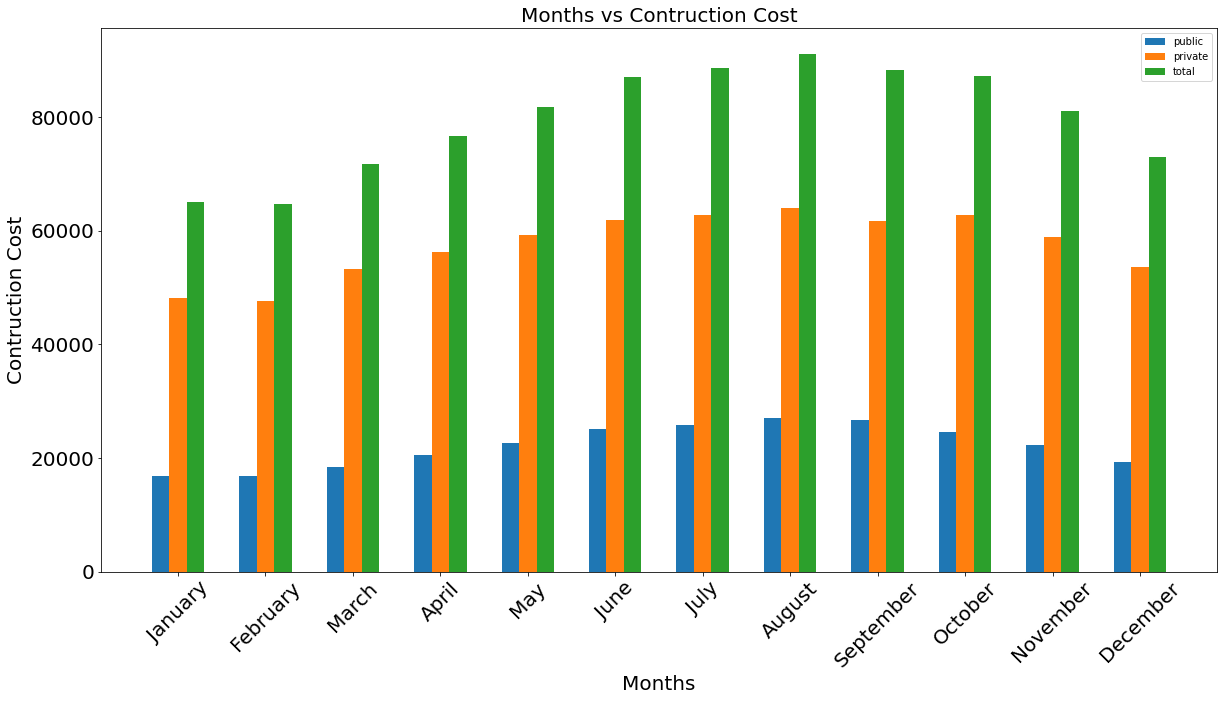

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# read data from csv and convert into dataframe
df = pd.read_csv('ConstructionTimeSeriesDataV2.csv')

# convert the dates to date time and change months column
df['Month-Year'] = pd.to_datetime(df['Month-Year'], format='%b-%y')
df['Month'] = pd.DatetimeIndex(df['Month-Year']).month_name()

# set the width size of bars and declare variables for x and y axis
w = 0.2
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
public_con = [[],[],[],[],[],[],[],[],[],[],[],[]]
private_con = [[],[],[],[],[],[],[],[],[],[],[],[]]
total_con = [[],[],[],[],[],[],[],[],[],[],[],[]]

# function for get average of a list
def average(lst): 
    return sum(lst) / len(lst) 

# function to append month's data to their respective column of public, private, and total construction
def append_construction(col, month):
    idx = months.index(month)
    if col['Month'] == month:
        public_con[idx].append((int(col['Public Construction'])))
        private_con[idx].append((int(col['Private Construction'])))
        total_con[idx].append((int(col['Total Construction'])))

# iterate through data frame to populate public, private, and total column
for i, j in df.iterrows():
    for x in months:
        append_construction(j, x)

# iterate through the months and calculate the average of the monthly data
for x in range(len(months)):
    public_con[x] = average(public_con[x])
    private_con[x] = average(private_con[x])
    total_con[x] = average(total_con[x])

# create bars with data, width and label and increase the figure size
bar1 = np.arange(len(months))
bar2 = [i+w for i in bar1]
bar3 = [i+w for i in bar2]

plt.figure(figsize=(20,10))

plt.bar(bar1, public_con, w, label="public")
plt.bar(bar2, private_con, w, label="private")
plt.bar(bar3, total_con, w, label="total")

# add labels to x and y axis and fix the x-axis ticks with data and rotation
plt.xlabel("Months", size=20)
plt.ylabel("Contruction Cost", size=20)
plt.title('Months vs Contruction Cost', size=20)
plt.xticks(bar1+w, months, size=20, rotation=45)
plt.yticks(size=20)
plt.legend()

# plot the figure
plt.show()